<a href="https://colab.research.google.com/github/suhcstt/Dados_Projeto_PY/blob/main/Teste_Projeto_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install gspread
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [24]:
from google.colab import auth
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
# Autentique sua conta do Google
auth.authenticate_user()
# Autorize o acesso ao Google Sheets
from google.auth import default
creds, _ = default()
client = gspread.authorize(creds)
# Use o link ou o ID da planilha para acessá-la:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1fpec5h4xGCbkGNox8alWPVYpmNT1KoinXqIj70eja-I/edit?usp=sharing"
# Abra a planilha pelo URL
spreadsheet = client.open_by_url(spreadsheet_url)
# Selecione uma aba (sheet)
sheet = spreadsheet.sheet1  # Primeiro aba
# Obtenha todos os valores
data = sheet.get_all_records()
print(data)



[{'Data': '03/12/23', 'Lote': 116008, 'Item': 319060958, 'Maquina': 'ACV 04', 'Quantidade': 7.6, 'Scrap': 1.912, '% REPROVA': '25,16%', 'Setor': 'N/A', 'Erro': 'NC001'}, {'Data': '03/12/23', 'Lote': 115975, 'Item': 23349080549, 'Maquina': 'ACV 05', 'Quantidade': 25.6, 'Scrap': 438, '% REPROVA': '1,71%', 'Setor': 'N/A', 'Erro': 'NC021'}, {'Data': '04/12/23', 'Lote': 116008, 'Item': 319060958, 'Maquina': 'ACV 04', 'Quantidade': 6.0, 'Scrap': 1.322, '% REPROVA': '22,03%', 'Setor': 'N/A', 'Erro': 'NC001'}, {'Data': '04/12/23', 'Lote': 115967, 'Item': 23309080582, 'Maquina': 'ACV 03', 'Quantidade': 24.0, 'Scrap': 1.444, '% REPROVA': '6,02%', 'Setor': 'N/A', 'Erro': 'NC021'}, {'Data': '04/12/23', 'Lote': 115887, 'Item': 23399106501, 'Maquina': 'ACV 05', 'Quantidade': 32.9, 'Scrap': 800, '% REPROVA': '2,43%', 'Setor': 'N/A', 'Erro': 'NC001'}, {'Data': '04/12/23', 'Lote': 116034, 'Item': 23349060564, 'Maquina': 'ACV 03', 'Quantidade': 35.2, 'Scrap': 658, '% REPROVA': '1,87%', 'Setor': 'N/A', '

In [25]:
import pandas as pd

# Converte os dados em um DataFrame
df = pd.DataFrame(data)

# Visualiza as primeiras linhas para confirmar
print(df.head())

       Data    Lote         Item Maquina  Quantidade    Scrap % REPROVA Setor  \
0  03/12/23  116008    319060958  ACV 04         7.6    1.912    25,16%   N/A   
1  03/12/23  115975  23349080549  ACV 05        25.6  438.000     1,71%   N/A   
2  04/12/23  116008    319060958  ACV 04         6.0    1.322    22,03%   N/A   
3  04/12/23  115967  23309080582  ACV 03        24.0    1.444     6,02%   N/A   
4  04/12/23  115887  23399106501  ACV 05        32.9  800.000     2,43%   N/A   

    Erro  
0  NC001  
1  NC021  
2  NC001  
3  NC021  
4  NC001  


In [26]:
df.rename(columns={
    'Dt': 'Data',
    'Lote': 'Lote',
    'Item': 'Item',
    'Maquina': 'Máquina',
    'Quantidade': 'Quantidade_Total',
    'Scrap': 'Quantidade_Scrap',
    '% REPROVA': 'Porcentagem_Reprova',
    'Setor': 'Setor',
    'Erro': 'Erro'
}, inplace=True)

# Tratar valores ausentes
df.dropna(subset=['Máquina', 'Quantidade_Scrap'], inplace=True)

# Converter a coluna Data para datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

<ipython-input-26-4a8461d79b9a>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Data'] = pd.to_datetime(df['Data'], errors='coerce')


In [27]:
#Quantidade de scrap por máquina:

scrap_por_maquina = df.groupby('Máquina')['Quantidade_Scrap'].sum()
print(scrap_por_maquina)


#Custo total de scrap por setor:

custo_por_setor = df.groupby('Setor')['Quantidade_Scrap'].sum()
print(custo_por_setor)


Máquina
ACV 01    32083.588
ACV 02    43743.723
ACV 03    37409.603
ACV 04    39208.752
ACV 05    26486.074
Name: Quantidade_Scrap, dtype: float64
Setor
CNC             6332.738
Davenport       9711.890
ESTAMPAGEM     29336.672
Estampagem    111543.117
N/A            22007.323
Name: Quantidade_Scrap, dtype: float64


<ipython-input-34-7ac3337d857a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scrap_por_maquina.values, y=scrap_por_maquina.index, palette="Blues")  # Paleta azul


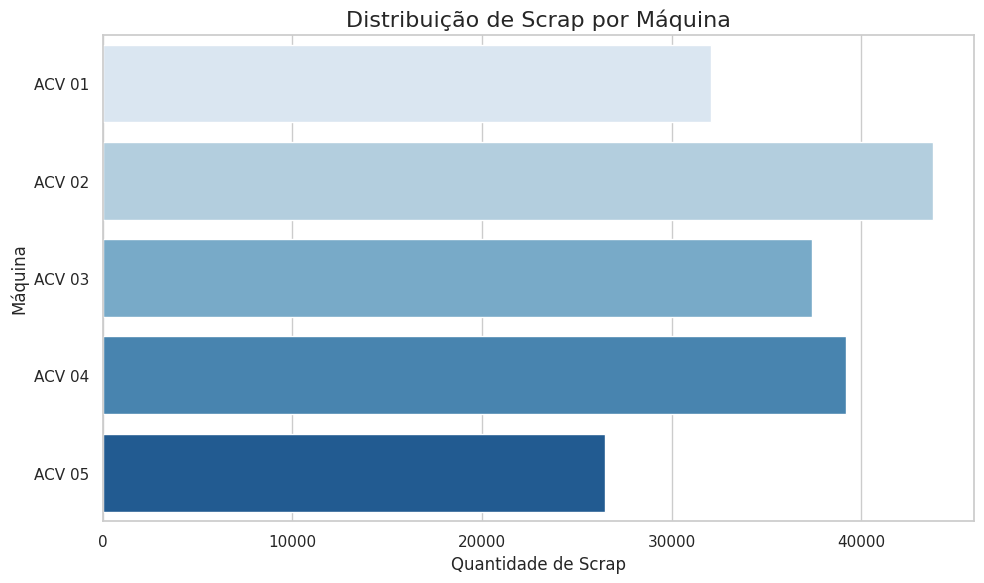

<ipython-input-34-7ac3337d857a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=custo_por_setor.values, y=custo_por_setor.index, palette="Blues_d")  # Paleta azul escuro


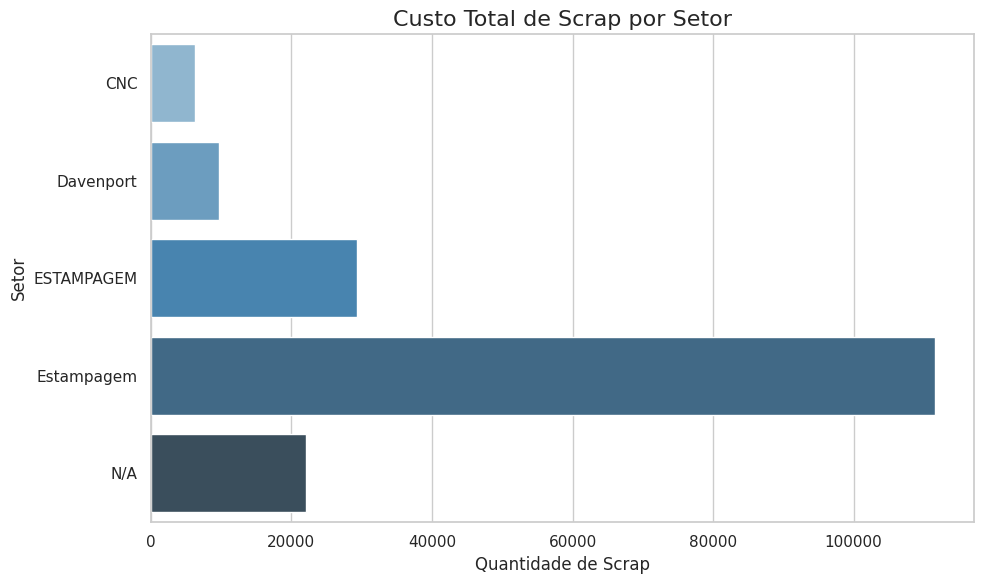

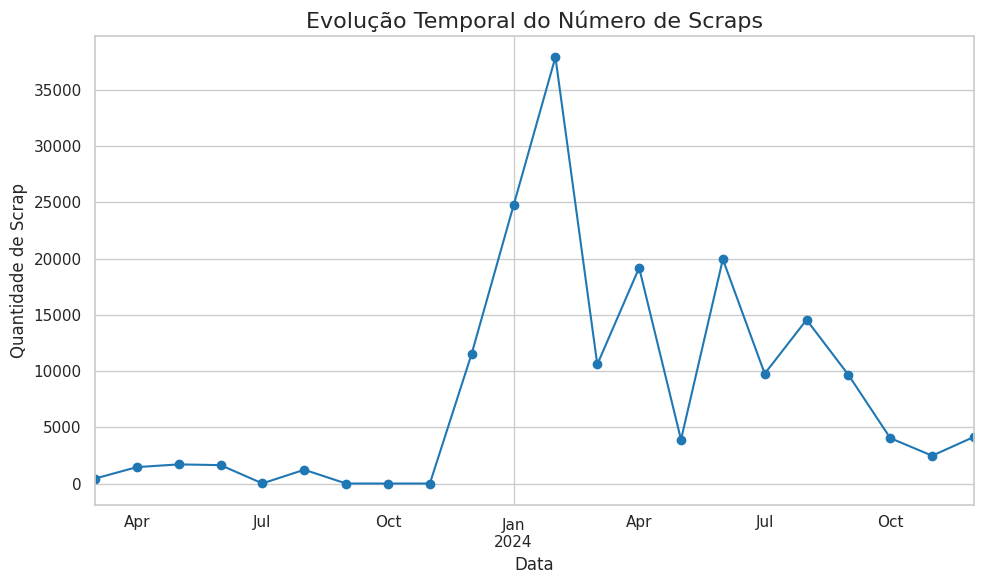

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico 1: Distribuição de scrap por máquina (Gráfico de barras)
def grafico_scrap_por_maquina(df):
    scrap_por_maquina = df.groupby('Máquina')['Quantidade_Scrap'].sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scrap_por_maquina.values, y=scrap_por_maquina.index, palette="Blues")  # Paleta azul
    plt.title('Distribuição de Scrap por Máquina', fontsize=16)
    plt.xlabel('Quantidade de Scrap', fontsize=12)
    plt.ylabel('Máquina', fontsize=12)
    plt.tight_layout()
    plt.show()

# Gráfico 2: Custo total de scrap por setor (Gráfico de barras horizontais)
def grafico_custo_por_setor(df):
    custo_por_setor = df.groupby('Setor')['Quantidade_Scrap'].sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=custo_por_setor.values, y=custo_por_setor.index, palette="Blues_d")  # Paleta azul escuro
    plt.title('Custo Total de Scrap por Setor', fontsize=16)
    plt.xlabel('Quantidade de Scrap', fontsize=12)
    plt.ylabel('Setor', fontsize=12)
    plt.tight_layout()
    plt.show()

# Gráfico 3: Evolução temporal do número de scraps (Gráfico de linhas)
def grafico_evolucao_scrap(df):
    df['Ano_Mes'] = df['Data'].dt.to_period('M')  # Agrupar por mês
    scrap_temporal = df.groupby('Ano_Mes')['Quantidade_Scrap'].sum()
    plt.figure(figsize=(10, 6))
    scrap_temporal.plot(kind='line', marker='o', color="#1f77b4")  # Cor azul
    plt.title('Evolução Temporal do Número de Scraps', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Quantidade de Scrap', fontsize=12)
    plt.tight_layout()
    plt.show()

# Gerar todos os gráficos
grafico_scrap_por_maquina(df)
grafico_custo_por_setor(df)
grafico_evolucao_scrap(df)